In [59]:
import pandas as pd
import tqdm
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

# from google.colab import drive
# drive.mount('/content/gdrive/')

In [5]:
# data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/hwayo.csv", encoding='utf-8')
data = pd.read_csv("hwayo.csv", encoding='utf-8')


data = data.drop(data.columns[[0,1,4,5,6,7,8,10,12,13,14,16,18,19]], axis='columns')

data = data.drop([0,1],0)

data.columns=['product','volume','employee','quantity','price','locate'] #거래일, 거래처, 물품, 수량, 가격, 출고지명

data = data.reset_index()

data = data.drop(data.columns[[0]], axis='columns')

data = data.drop(len(data)-1)

data = data.fillna(value='0')

data = data[data.locate != '기타']

data = data.reset_index()

data = data.drop(data.columns[[0]], axis='columns')

data['volume'] = pd.to_numeric(data['volume'])



for i in tqdm.trange(len(data)):
  data['price'][i] = int(data['price'][i].replace(",",""))
  data['quantity'][i] = int(data['quantity'][i].replace(",",""))


# 직영점 기타, 기타는 제거


100%|██████████| 3235/3235 [00:00<00:00, 4860.57it/s]


In [9]:
employee_list = list(set(data['employee']))

In [15]:
# table = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/table.csv", encoding='utf-8')
table = pd.read_csv("table.csv", encoding='utf-8')
table.rename(columns = {'Unnamed: 0' : 'alcohol', 'Unnamed: 1' : 'volume'}, inplace = True)
# product_list = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/product_list.csv", encoding='utf-8')
product_list = pd.read_csv("product_list.csv", encoding='utf-8')

In [29]:
for i in employee_list:
    table[i] = 0

In [30]:
for i in range(0,len(data)):
  volume = int(data['volume'][i])
  quantity = int(data['quantity'][i])
  employee = str(data['employee'][i])
  for j in range(0,len(product_list)):
    if data['product'][i] == product_list['product'][j]:
      alcohol = product_list['alcohol'][j]
      for k in range(0, len(table)):
        if alcohol == 1 or alcohol == 2 or alcohol == 3 or alcohol == 4 or alcohol == 5:
          if table['alcohol'][k] == alcohol:
            table[employee][k] += quantity
        else:
          if table['alcohol'][k] == alcohol:
            if str(volume) == table['volume'][k]:
              table[employee][k] += quantity


      

In [32]:
# table.to_csv("/content/gdrive/My Drive/Colab Notebooks/result.csv", header=True, index=False, encoding='cp949')
table.to_csv("result.csv", header=True, index=False, encoding='cp949')

In [42]:
dict_table = dict(table.sum(axis=0))
del(dict_table['alcohol'])
del(dict_table['volume'])

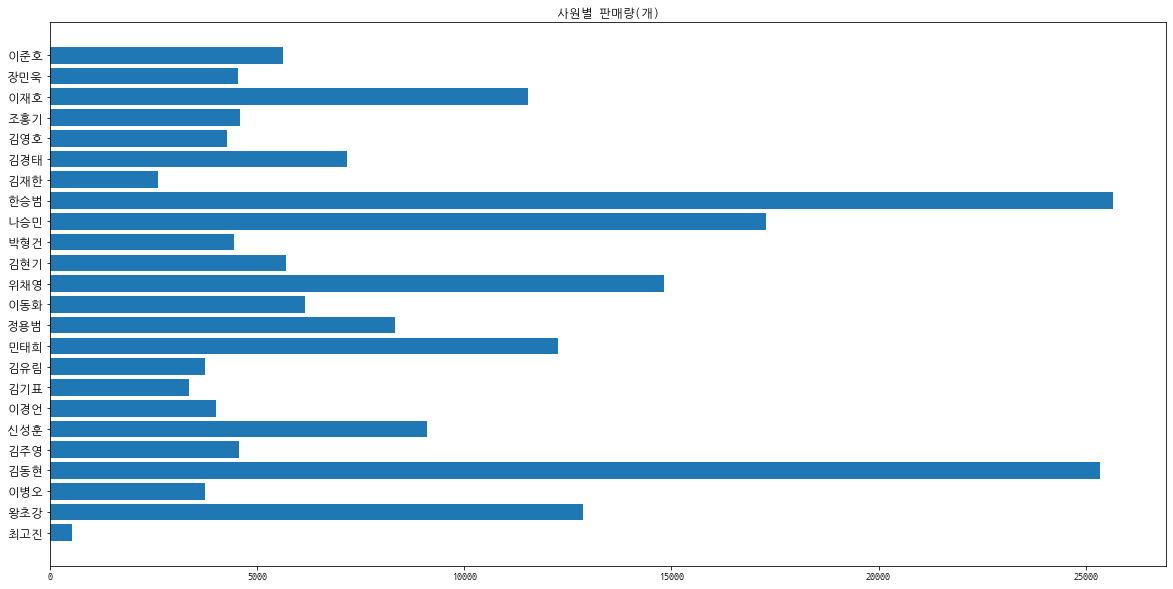

In [100]:
font_name = fm.FontProperties(fname="NanumGothicCoding.ttf", size=12).get_name()
matplotlib.rc('font', family=font_name)
x, y = zip(*dict_table.items())
plt.figure(figsize=(20,10))
plt.yticks(fontsize=12)
plt.barh(x, y)
plt.title("사원별 판매량(개)")
plt.savefig("사원별 판매량.jpg")
